# Importing Libraries

In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp , log, log10
import warnings
warnings.filterwarnings("ignore")

os.chdir('../dependencies/')
from logistic_regression import logistic_regression

# Preprocessing Data
##### Manual Method
To be tweaked according to data

In [28]:
os.chdir("../data/")
path = 'heart_disease'
filename = 'Heart.csv'
filepath = os.path.join(path,filename)
df_raw = analytics.read_csv(filepath)
df_raw

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [29]:
for col in df_raw.columns[1:]:    print(col," : ",df_raw[col].unique())

Age  :  [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
Sex  :  [1 0]
ChestPain  :  ['typical' 'asymptomatic' 'nonanginal' 'nontypical']
RestBP  :  [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Chol  :  [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 237 2

In [30]:
df_raw = df_raw.drop(['Unnamed: 0','Sex','ChestPain','Fbs','RestECG','ExAng','Slope','Ca','Thal'],axis = 1)
df_raw['AHD'] = df_raw['AHD'].replace('Yes',1).replace('No',0)
df_raw

,Age,RestBP,Chol,MaxHR,Oldpeak,AHD
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0
...,...,...,...,...,...,...
298,45,110,264,132,1.2,1
299,68,144,193,141,3.4,1
300,57,130,131,115,1.2,1
301,57,130,236,174,0.0,1


In [31]:
df_raw

,Age,RestBP,Chol,MaxHR,Oldpeak,AHD
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0
...,...,...,...,...,...,...
298,45,110,264,132,1.2,1
299,68,144,193,141,3.4,1
300,57,130,131,115,1.2,1
301,57,130,236,174,0.0,1


In [22]:
new_filename = 'data1_changed'
df_raw.to_csv(new_filename+".csv",header = False,index = False)

In [7]:
new_filename = filename
new_filename = 'data4'

# Defining Parameters

In [23]:
validation_perc = 0.7
training_perc = 0.8
alphas = maths.arange(0.1,1,0.1)
epsilon = 5e-2
threshold = 0.5
number_of_iterations = 10

# Processing and Predicting

In [24]:
log_reg = logistic_regression(epsilon = epsilon , threshold = threshold)
log_reg.load_data(new_filename)
log_reg.df_data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,1,1.0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,1,2.0,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,1,3.0,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,1,4.0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,1,5.0,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,299.0,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,1,300.0,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,1,301.0,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,1,302.0,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [10]:
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)

In [11]:
log_reg.find_weights(df_validation , alphas, number_of_iterations, process="logistic" )


Iteration Number : 1
---------------------
  For alpha :  0.1     Accuracy :  100.0%     Number of iterations : 90
  For alpha :  0.2     Accuracy :  100.0%     Number of iterations : 102
  For alpha :  0.3     Accuracy :  100.0%     Number of iterations : 104
  For alpha :  0.4     Accuracy :  100.0%     Number of iterations : 106
  For alpha :  0.5     Accuracy :  100.0%     Number of iterations : 114
  For alpha :  0.6     Accuracy :  100.0%     Number of iterations : 112
  For alpha :  0.7     Accuracy :  100.0%     Number of iterations : 120
  For alpha :  0.8     Accuracy :  100.0%     Number of iterations : 124
  For alpha :  0.9     Accuracy :  100.0%     Number of iterations : 122

Iteration Number : 2
---------------------
  For alpha :  0.1     Accuracy :  100.0%     Number of iterations : 80
  For alpha :  0.2     Accuracy :  100.0%     Number of iterations : 101
  For alpha :  0.3     Accuracy :  100.0%     Number of iterations : 100
  For alpha :  0.4     Accuracy :  100.

Confusion Matrix :  {'tp': 27, 'tn': 18, 'fp': 0, 'fn': 0}
Accuracy :  100.0 %
Precision :  100.0 %
Sensivity :  100.0 %
Specificity :  100.0 %
F1 Score :  100.0


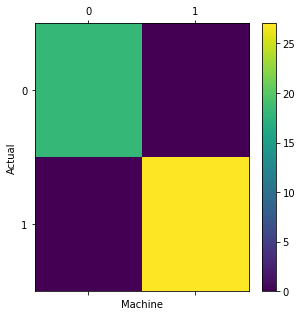

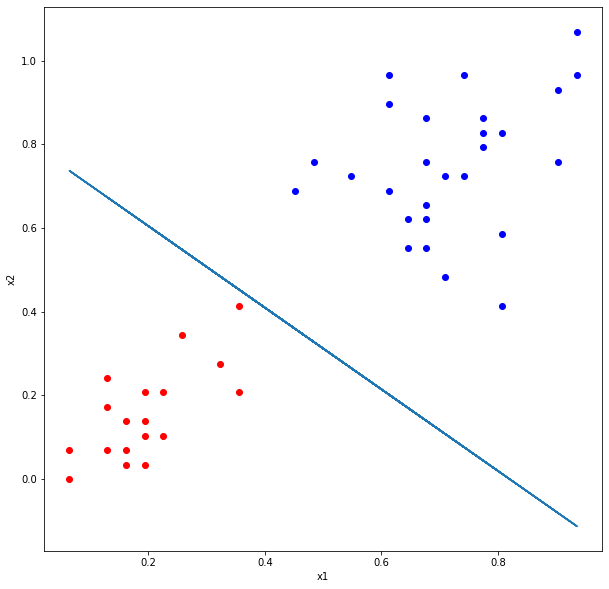

In [12]:
df_test = log_reg.classify(df_test)

In [13]:
# df_pve = df_test[df_test['y'] == 1]
# df_nve = df_test[df_test['y'] == 0]

# hyperplane = (log_reg.w_star[1] * df_test['x1'] + log_reg.w_star[0]) / -log_reg.w_star[2]

# figure = graph.figure(figsize = (10,10))

# graph.scatter(df_pve['x1'],df_pve['x2'], c = 'b')
# graph.scatter(df_nve['x1'],df_nve['x2'], c = 'r')
# graph.xlabel('x1')
# graph.ylabel('x2')
# graph.plot(df_test['x1'],hyperplane)


# graph.show()

In [14]:
# len(df_test.columns)